In [11]:
from osgeo import gdal
from osgeo import ogr
import geopandas as gpd


In [2]:
def dump_poly(raster_fname, vector_fname, ifeat):
    # New filename. Assumes input raster file has '.tif' extension
    # Might need to change how you build the output filename
    fname_out = raster_fname.replace(".tif", f"_{int(ifeat):05}.tif")
    # Do the actual clipping
    g = gdal.Warp(fname_out, raster_fname, format="GTiff",
                    cutlineDSName=vector_fname,
                    cutlineWhere=f"id={ifeat:d}",
                    cropToCutline=True)
    # Return the fname just because
    return fname_out

In [16]:
vector_fname = "/home/lstam/Documents/newriskmodel/perif/d7f50467-e5ef-49ac-a7ce-15df3e2ed738.shp"
# raster_fname = "/home/lstam/Documents/daily_rasters/tif/20230630_norm_pred_risklev.tif"
# Open raster file, select first and unique layer
gg = ogr.Open(vector_fname)
layer = gg.GetLayerByIndex(0)


In [17]:
layer.GetName()

'aktogrammh'

In [16]:
gdf = gpd.read_file("/home/lstam/Documents/newriskmodel/perif/periphereies.shp", encoding='Windows-1253')

In [17]:
gdf

,PER,geometry
0,Π. ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ - ΘΡΑΚΗΣ,"MULTIPOLYGON (((468363.189 4577898.998, 468365..."
1,Π. ΚΕΝΤΡΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,"MULTIPOLYGON (((306365.379 4525842.998, 306368..."
2,Π. ΔΥΤΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ,"POLYGON ((226087.989 4471633.998, 226102.009 4..."
3,Π. ΗΠΕΙΡΟΥ,"MULTIPOLYGON (((157581.777 4400827.998, 157583..."
4,Π. ΘΕΣΣΑΛΙΑΣ,"MULTIPOLYGON (((252882.049 4395793.998, 252884..."
5,Π. ΒΟΡΕΙΟΥ ΑΙΓΑΙΟΥ,"MULTIPOLYGON (((583302.439 4372793.498, 583308..."
6,Π. ΝΟΤΙΟΥ ΑΙΓΑΙΟΥ,"MULTIPOLYGON (((511410.309 4039985.999, 511410..."
7,Π. ΣΤΕΡΕΑΣ ΕΛΛΑΔΑΣ,"MULTIPOLYGON (((272558.249 4321865.998, 272571..."
8,Π. ΔΥΤΙΚΗΣ ΕΛΛΑΔΑΣ,"MULTIPOLYGON (((245118.969 4192904.499, 245147..."
9,Π. ΠΕΛΟΠΟΝΝΗΣΟΥ,"MULTIPOLYGON (((281006.999 4103543.999, 281008..."


In [19]:
gdfd=gdf.dissolve()

<AxesSubplot:>

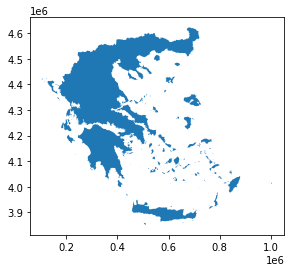

In [20]:
%matplotlib inline
gdfd.plot()

In [22]:
gdfd.to_crs(4326)

,geometry,PER
0,"MULTIPOLYGON (((24.11665 34.80359, 24.11688 34...",Π. ΑΝΑΤΟΛΙΚΗΣ ΜΑΚΕΔΟΝΙΑΣ - ΘΡΑΚΗΣ


In [24]:
gdfd.to_file('/home/lstam/Documents/newriskmodel/greece2100.shp')